In [63]:
import pandas as pd
import seaborn as sns

In [64]:
dados = pd.read_csv('../data/flights_with_noise.csv')

In [65]:
dados

flight_id airline aircraft_type      schengen origin  arrival_time  \
0             25      AC    Boeing 737      schengen    ETA     18.698793   
1              9      FX   Airbus A320      schengen    XRH      6.451713   
2             25      AC    Boeing 737      schengen    ETA     18.698793   
3             20      FX    Boeing 787      schengen    IXX      9.459319   
4              8      FX    Boeing 787      schengen    PKI      8.932979   
...          ...     ...           ...           ...    ...           ...   
71170          8      FX    Boeing 787      schengen    PKI      8.932979   
71171         19      FX   Airbus A320  non-schengen    PKI      8.695022   
71172          7      FX   Airbus A320      schengen    IXX     11.741223   
71173          6      AC   Airbus A330      schengen    XRH     20.110072   
71174          8      FX    Boeing 787      schengen    PKI      8.932979   

       departure_time  day  year  is_holiday      delay  
0           22.698793    0  2010       False  57.415993  
1            8.451713    0  2010       False  65.244973  
2           22.698793    0  2010       False  45.725256  
3           15.459319    0  2010       False  42.678808  
4           10.932979    0  2010       False  36.232255  
...               ...  ...   ...         ...        ...  
71170       10.932979  364  2022       False  40.038435  
71171       12.695022  364  2022       False  54.614927  
71172       14.741223  364  2022       False  71.971362  
71173       22.110072  364  2022       False  73.441157  
71174       10.932979  364  2022       False  48.859528  

[71175 rows x 11 columns]

In [66]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [67]:
dados['delay']

0        57.415993
1        65.244973
2        45.725256
3        42.678808
4        36.232255
           ...    
71170    40.038435
71171    54.614927
71172    71.971362
71173    73.441157
71174    48.859528
Name: delay, Length: 71175, dtype: float64

In [68]:
from datetime import datetime, timedelta

In [69]:
def convert_day_to_date(day, year):
    base_date = datetime(year=year, month=1, day=1)
    target_date = base_date + timedelta(days=day)
    return target_date.strftime('%Y-%m-%d')  # Format the date as desired

# Convert 'day' column to regular dates
dados['date'] = dados.apply(lambda row: convert_day_to_date(row['day'], row['year']), axis=1)

In [70]:
dados

flight_id airline aircraft_type      schengen origin  arrival_time  \
0             25      AC    Boeing 737      schengen    ETA     18.698793   
1              9      FX   Airbus A320      schengen    XRH      6.451713   
2             25      AC    Boeing 737      schengen    ETA     18.698793   
3             20      FX    Boeing 787      schengen    IXX      9.459319   
4              8      FX    Boeing 787      schengen    PKI      8.932979   
...          ...     ...           ...           ...    ...           ...   
71170          8      FX    Boeing 787      schengen    PKI      8.932979   
71171         19      FX   Airbus A320  non-schengen    PKI      8.695022   
71172          7      FX   Airbus A320      schengen    IXX     11.741223   
71173          6      AC   Airbus A330      schengen    XRH     20.110072   
71174          8      FX    Boeing 787      schengen    PKI      8.932979   

       departure_time  day  year  is_holiday      delay        date  
0           22.698793    0  2010       False  57.415993  2010-01-01  
1            8.451713    0  2010       False  65.244973  2010-01-01  
2           22.698793    0  2010       False  45.725256  2010-01-01  
3           15.459319    0  2010       False  42.678808  2010-01-01  
4           10.932979    0  2010       False  36.232255  2010-01-01  
...               ...  ...   ...         ...        ...         ...  
71170       10.932979  364  2022       False  40.038435  2022-12-31  
71171       12.695022  364  2022       False  54.614927  2022-12-31  
71172       14.741223  364  2022       False  71.971362  2022-12-31  
71173       22.110072  364  2022       False  73.441157  2022-12-31  
71174       10.932979  364  2022       False  48.859528  2022-12-31  

[71175 rows x 12 columns]

In [71]:
import plotly.express as px

In [72]:
px.line(dados[dados['year']==2018], x = 'date', y = 'delay', color = 'airline')

In [73]:
px.histogram(dados, x = 'delay')

In [74]:
px.histogram(dados, x = 'delay', color = 'airline')

In [75]:
px.histogram(dados, x = 'delay', color = 'aircraft_type')

In [76]:
px.histogram(dados, x = 'delay', color = 'origin')

In [77]:
dados['delay'].mean()

48.104017105220976

In [78]:
dados['delay'].median()

45.90837858335505

In [79]:
dados['airline'].value_counts()

airline
FX    49732
AC    21443
Name: count, dtype: int64

In [80]:
dados.groupby('origin')['delay'].mean()

origin
AHG    45.580460
AML    50.695371
ETA    47.139624
IXX    45.279979
IYV    42.145213
LBO    50.662403
PKI    47.084366
REZ    49.361657
VRA    58.631009
XRH    45.753000
Name: delay, dtype: float64

In [81]:
dados.groupby('aircraft_type')['delay'].mean()

aircraft_type
Airbus A320     53.069202
Airbus A330     39.656592
Boeing 737      53.757313
Boeing 777      45.527936
Boeing 787      36.286101
Embraer E175    40.311492
Name: delay, dtype: float64

In [82]:
dados.groupby('airline')['delay'].mean()

airline
AC    48.583954
FX    47.897082
Name: delay, dtype: float64

In [83]:
sns.__version__

'0.11.2'

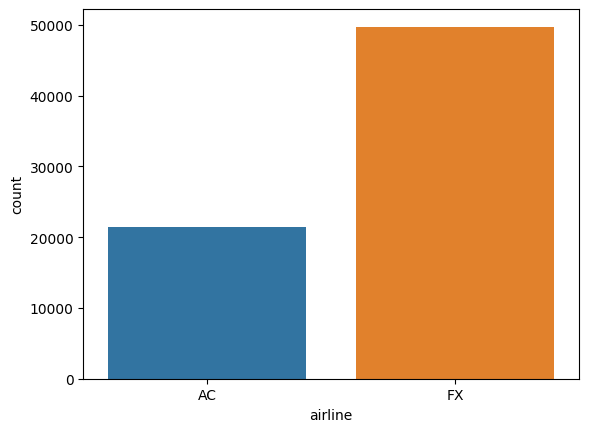

In [84]:
_ = sns.countplot(x=dados['airline'])

In [85]:
dados['aircraft_type'].value_counts()

aircraft_type
Airbus A320     37954
Boeing 787      11862
Embraer E175     7079
Boeing 737       7055
Boeing 777       4777
Airbus A330      2448
Name: count, dtype: int64

c:\Users\Igor\Documents\GitHub\data_flight_delays\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='aircraft_type', ylabel='count'>

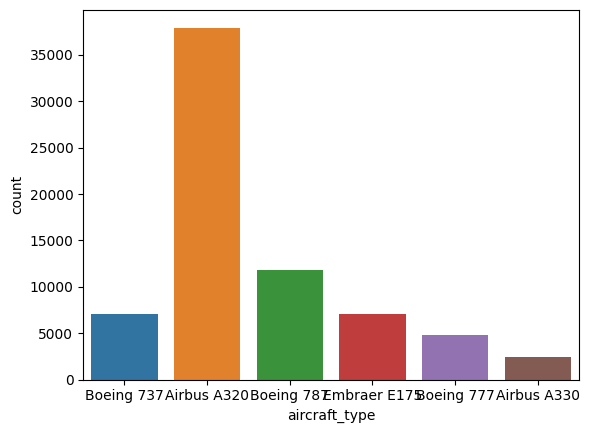

In [86]:
sns.countplot(dados['aircraft_type'])

In [87]:
dados['origin'].value_counts()

origin
XRH    16756
IXX    16550
PKI     9464
VRA     9426
ETA     4776
AML     4736
REZ     2436
IYV     2379
AHG     2342
LBO     2310
Name: count, dtype: int64

c:\Users\Igor\Documents\GitHub\data_flight_delays\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='origin', ylabel='count'>

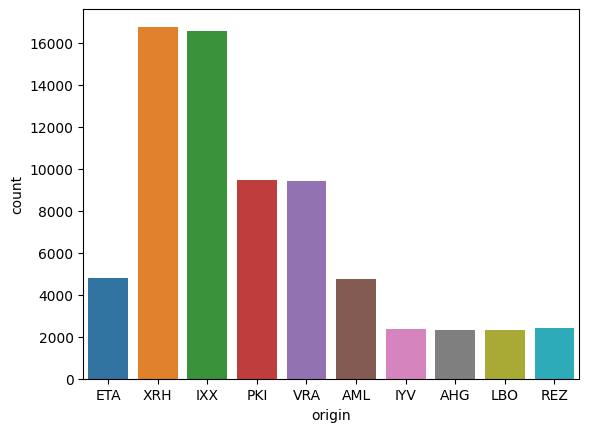

In [88]:
sns.countplot(dados['origin'])

In [89]:
dados['schengen'].value_counts(normalize= True)

schengen
schengen        0.835139
non-schengen    0.164861
Name: proportion, dtype: float64

c:\Users\Igor\Documents\GitHub\data_flight_delays\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='schengen', ylabel='count'>

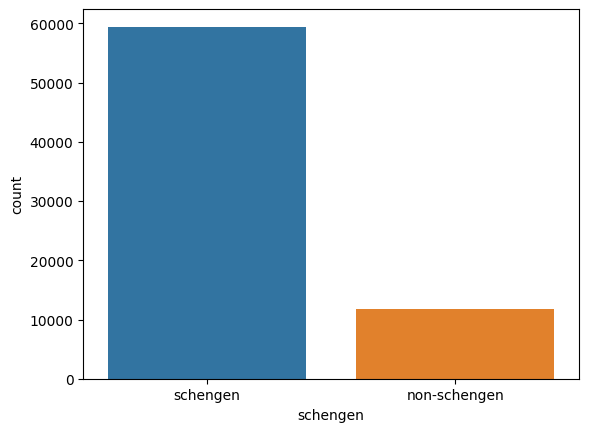

In [90]:
sns.countplot(dados['schengen'])

OptionError: No such keys(s): 'mode.use_inf_as_null'

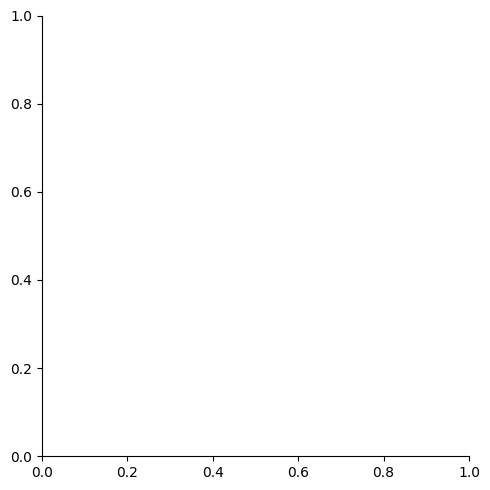

In [91]:
sns.displot(dados['delay'])

In [ ]:
sns.displot(dados['arrival_time'])

In [ ]:
sns.displot(dados['departure_time'])

In [ ]:
sns.boxplot(dados['delay'])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
categorical_vars = ['airline', 'aircraft_type', 'origin']

# Perform one-hot encoding
df_encoded_4 = pd.get_dummies(dados, columns=categorical_vars, dtype=int)

df_encoded_4['is_holiday'] = df_encoded_4['is_holiday'].map({False: 0, True: 1})
df_encoded_4['schengen'] = df_encoded_4['schengen'].map({'non-schengen': 0, 'schengen': 1})
df_encoded_4['is_weekend'] = df_encoded_4['day'].apply(lambda day: day % 7 == 0 or day % 7 == 6)

X = df_encoded_4.drop(['flight_id', 'day', 'year','departure_time', 'delay', 'date'], axis=1)
y = df_encoded_4['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state=42

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

model = RandomForestRegressor()
rfe = RFE(model)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

In [ ]:
model_boosting = GradientBoostingRegressor()
model_boosting.fit(X_train, y_train)

y_pred = model_boosting.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

In [ ]:
!python -m pip install statsmodels

In [ ]:
px.scatter(x = y_test, y = y_pred, trendline = 'ols', trendline_color_override = 'red',opacity = 0.2)

In [ ]:
px.scatter(x = y_pred, y = (y_pred - y_test), trendline = 'ols', trendline_color_override = 'red',opacity = 0.2)

In [ ]:
import seaborn as sns

In [ ]:
from scipy.stats import skewnorm
import numpy as np

In [ ]:
a = 5

In [ ]:
r = skewnorm.rvs(a, size=1000)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a),
                skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='skewnorm pdf')
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()